In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

13.305768556430792 42.094229577154834
-61.70222692221956 102.54619791653533
6.702103053064278 66.63287283877824
-21.297950817335263 58.77351195718751
-66.20055998447265 173.15904024827455
-85.06322641264074 -44.230366754040176
-18.137518710508687 91.90686620660136
77.20023383046271 70.77995986499667
-28.826569972552754 -11.538608666254618
-4.145980179342544 59.422595627870464
39.01803733898839 -25.164453695893087
-7.107998431898153 -85.60780059705465
9.094229445009361 163.69513096567704
-13.449028394175286 63.557471596901564
3.997464290767823 -114.9336921172557
-28.772905909574597 174.61276618106382
53.832934913449435 69.54017484352528
47.64378116603032 -153.57742265850612
58.50406769919397 -38.68859557224965
-16.640936201762173 8.45844550514704
1.4143746133580208 -2.469138354069031
43.14841871473891 -106.43084868263793
13.079420901542633 104.43733944717701
2.5918203192938734 119.9881940190931
74.13537139722115 95.47017954801458
-29.31338640040736 86.29848516867486
59.50456083189445 14

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    
   # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | edd
Processing Record 2 of Set 12 | albany
Processing Record 3 of Set 12 | kulhudhuffushi
Processing Record 4 of Set 12 | mahebourg
Processing Record 5 of Set 12 | bluff
Processing Record 6 of Set 12 | ushuaia
Processing Record 7 of Set 12 | bengkulu
Processing Record 8 of Set 12 | yar-sale
Processing Record 9 of Set 12 | jamestown
Processing Record 10 of Set 12 | victoria
Processing Record 11 of Set 12 | rabo de peixe
Processing Record 12 of Set 12 | paita
Processing Record 13 of Set 12 | butaritari
Processing Record 14 of Set 12 | grand gaube
Processing Record 15 of Set 12 | san patricio
Processing Record 16 of Set 12 | kaeo
Processing Record 17 of Set 12 | krasnoarmeysk
Processing Record 18 of Set 12 | kodiak
Processing Record 19 of Set 12 | nanortalik
Processing Record 20 of Set 12 | namibe
Processing Record 21 of Set 12 | axim
Processing Record 22 of Set 12 | casper
Processing Record 23 of 

Processing Record 34 of Set 15 | gashua
Processing Record 35 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 36 of Set 15 | the valley
Processing Record 37 of Set 15 | matara
Processing Record 38 of Set 15 | port elizabeth
Processing Record 39 of Set 15 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 15 | eureka
Processing Record 41 of Set 15 | choya
Processing Record 42 of Set 15 | sorvag
City not found. Skipping...
Processing Record 43 of Set 15 | cairns
Processing Record 44 of Set 15 | kintampo
Processing Record 45 of Set 15 | touros
Processing Record 46 of Set 15 | fort saint james
Processing Record 47 of Set 15 | beroroha
Processing Record 48 of Set 15 | saint-pierre
Processing Record 49 of Set 15 | bonavista
Processing Record 50 of Set 15 | kahului
Processing Record 1 of Set 16 | hisar
Processing Record 2 of Set 16 | kenora
Processing Record 3 of Set 16 | pacific grove
Processing Record 4 of Set 16 | tuatapere
Processing Record 5 of Set 

Processing Record 17 of Set 19 | saint-francois
Processing Record 18 of Set 19 | safford
Processing Record 19 of Set 19 | segovia
Processing Record 20 of Set 19 | ezhou
Processing Record 21 of Set 19 | trat
Processing Record 22 of Set 19 | shimanovsk
Processing Record 23 of Set 19 | tubruq
City not found. Skipping...
Processing Record 24 of Set 19 | verkhnyaya inta
Processing Record 25 of Set 19 | athabasca
Processing Record 26 of Set 19 | srednekolymsk
Processing Record 27 of Set 19 | raga
Processing Record 28 of Set 19 | hay river
Processing Record 29 of Set 19 | boulder city
Processing Record 30 of Set 19 | mongo
Processing Record 31 of Set 19 | keetmanshoop
Processing Record 32 of Set 19 | marsa matruh
Processing Record 33 of Set 19 | san carlos de bariloche
Processing Record 34 of Set 19 | provideniya
Processing Record 35 of Set 19 | kamenka
Processing Record 36 of Set 19 | faya
Processing Record 37 of Set 19 | praia da vitoria
Processing Record 38 of Set 19 | inhambane
Processing

Processing Record 4 of Set 23 | golden
Processing Record 5 of Set 23 | vagay
Processing Record 6 of Set 23 | oranjemund
Processing Record 7 of Set 23 | sheridan
Processing Record 8 of Set 23 | alugan
Processing Record 9 of Set 23 | sakaiminato
Processing Record 10 of Set 23 | ohara
Processing Record 11 of Set 23 | sabang
Processing Record 12 of Set 23 | kyren
Processing Record 13 of Set 23 | loreto
Processing Record 14 of Set 23 | barela
Processing Record 15 of Set 23 | ambodifototra
City not found. Skipping...
Processing Record 16 of Set 23 | sahrak
City not found. Skipping...
Processing Record 17 of Set 23 | bongandanga
Processing Record 18 of Set 23 | nova serrana
Processing Record 19 of Set 23 | khandyga
Processing Record 20 of Set 23 | bozoum
Processing Record 21 of Set 23 | hirara
Processing Record 22 of Set 23 | babu
Processing Record 23 of Set 23 | chake chake
Processing Record 24 of Set 23 | saint-georges
Processing Record 25 of Set 23 | bontang
Processing Record 26 of Set 23 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edd,13.9297,41.6925,74.98,65,6,18.95,ER,2023-01-31 02:44:49
1,Albany,42.6001,-73.9662,30.63,86,99,5.19,US,2023-01-31 02:40:06
2,Kulhudhuffushi,6.6221,73.0700,80.10,75,100,10.36,MV,2023-01-31 02:44:49
3,Mahebourg,-20.4081,57.7000,78.26,88,40,3.44,MU,2023-01-31 02:44:49
4,Bluff,-46.6000,168.3333,66.20,75,50,10.76,NZ,2023-01-31 02:44:49
5,Ushuaia,-54.8000,-68.3000,44.26,65,20,9.22,AR,2023-01-31 02:44:50
6,Bengkulu,-3.8004,102.2655,82.20,71,100,3.74,ID,2023-01-31 02:44:22
7,Yar-Sale,66.8333,70.8333,-17.18,100,56,6.17,RU,2023-01-31 02:44:50
8,Jamestown,42.0970,-79.2353,27.99,93,100,6.91,US,2023-01-31 02:39:56
9,Victoria,22.2855,114.1577,66.25,49,100,5.99,HK,2023-01-31 02:42:16


In [8]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Edd,ER,2023-01-31 02:44:49,13.9297,41.6925,74.98,65,6,18.95
1,Albany,US,2023-01-31 02:40:06,42.6001,-73.9662,30.63,86,99,5.19
2,Kulhudhuffushi,MV,2023-01-31 02:44:49,6.6221,73.0700,80.10,75,100,10.36
3,Mahebourg,MU,2023-01-31 02:44:49,-20.4081,57.7000,78.26,88,40,3.44
4,Bluff,NZ,2023-01-31 02:44:49,-46.6000,168.3333,66.20,75,50,10.76
5,Ushuaia,AR,2023-01-31 02:44:50,-54.8000,-68.3000,44.26,65,20,9.22
6,Bengkulu,ID,2023-01-31 02:44:22,-3.8004,102.2655,82.20,71,100,3.74
7,Yar-Sale,RU,2023-01-31 02:44:50,66.8333,70.8333,-17.18,100,56,6.17
8,Jamestown,US,2023-01-31 02:39:56,42.0970,-79.2353,27.99,93,100,6.91
9,Victoria,HK,2023-01-31 02:42:16,22.2855,114.1577,66.25,49,100,5.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

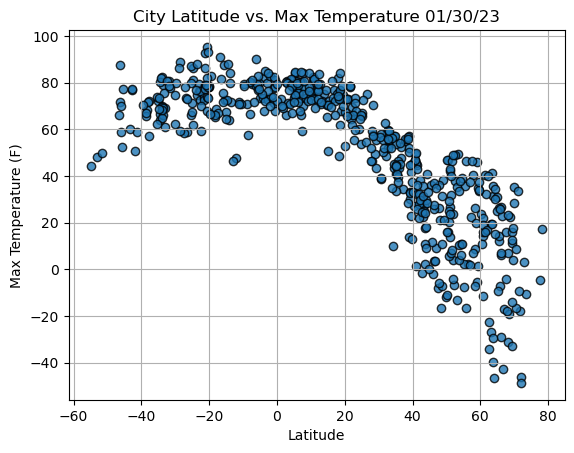

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


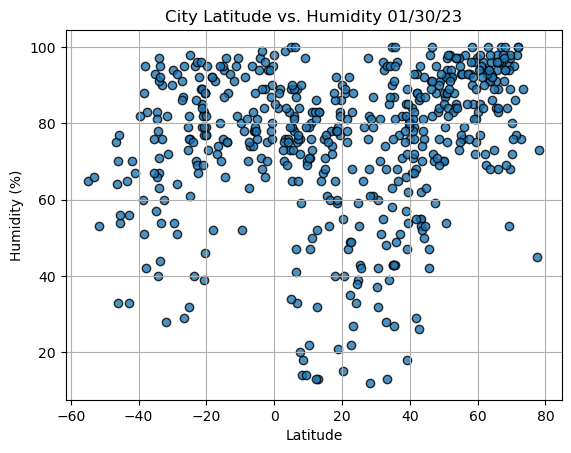

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

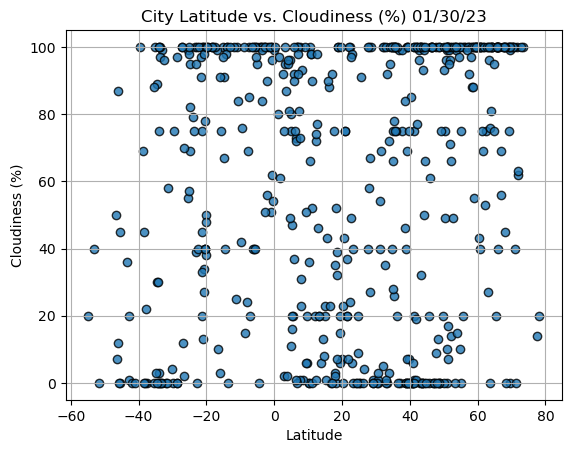

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()